<a href="https://colab.research.google.com/github/wafer110/Python-DataMining-MachineLearning/blob/master/HW1_Part1_WeiHuaHsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Packages

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import warnings; warnings.filterwarnings("ignore")
# Machine Learning Algorithms
from sklearn.model_selection import train_test_split # Split to train/test data
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.neural_network import MLPClassifier # Multi-Layer Perceptrons
from sklearn.model_selection import cross_val_score # Accuracy & AUC score
from sklearn.feature_selection import SelectKBest # Univariate F-test FS
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier # Tree-based Feature Selection
from sklearn.feature_selection import SelectFromModel

## Read Datasets

In [2]:
ozone_url = 'https://raw.githubusercontent.com/wafer110/Python-DataMining-MachineLearning/master/HW1/ozone-level.csv'
ozone = pd.read_csv(ozone_url)

steel_url = 'https://raw.githubusercontent.com/wafer110/Python-DataMining-MachineLearning/master/HW1/steel-plates.csv'
steel = pd.read_csv(steel_url)

### Data Manipulation - steel-plates  
Get the subset data for both multi-class & binary class problem.

  - Multi-Class: Set class as 7 types of faults   
    1 = Pastry;     
    2 = Z_Scratch;   
    3 = K_Scatch;  
    4 = Stains;  
    5 = Dirtiness;  
    6 = Bumps;  
    7 = Other_Faults

In [151]:
# replace the class entries 1 as different class 1-7
steel['V29'] = steel['V29'].replace([1], 2)
steel['V30'] = steel['V30'].replace([1], 3)
steel['V31'] = steel['V31'].replace([1], 4)
steel['V32'] = steel['V32'].replace([1], 5)
steel['V33'] = steel['V33'].replace([1], 6)
steel['V34'] = steel['Class'].replace([1,2], [0,7])
# create a new column 'multi-class'
steel['multi_class'] = steel['V28']
# store multi-class variables into the new column
steel['multi_class'][158:348]   = 2
steel['multi_class'][348:739]   = 3
steel['multi_class'][739:811]   = 4
steel['multi_class'][811:866]   = 5
steel['multi_class'][866:1268]  = 6
steel['multi_class'][1268:1941] = 7

# save to a new subset: 'steel_mul'
steel_data = steel.iloc[:, 0:27]
steel_mul = pd.concat([steel_data, steel.multi_class], axis = 1)

  - Binary Class: Set class as a binary problem  
    1 = Common; 
    2 = Other Fault

In [152]:
# save to a new subset: 'steel_bin'
steel_bin = pd.concat([steel_data, steel.Class], axis = 1)

# Part I

1. At which points (in terms of training set-size and classifier) do we observe overfitting in each data set?  
2. Can overfitting be overcome by feature selection?  
3. Are either of your datasets imbalanced? Select the most imbalanced one and show the results obtained using the following four methods on the full data set:  
    - Do nothing  
    - Randomly oversample the minority class  
    - Randomly undersample the minority class  
    - Use SMOTE to oversample the minority class.  

## 1) At which points (in terms of training set-size and classifier) do we observe overfitting in each data set?

### 1-1 ozone data

#### 1-1.1 Decision Tree

Text(0, 0.5, 'AUC Score')

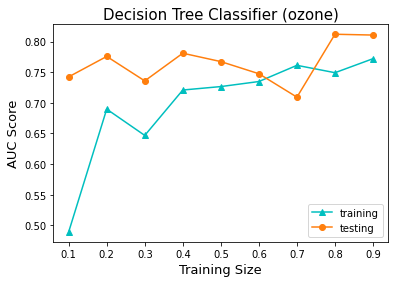

In [7]:
# Get Features & Target variables
features_columns = ozone.columns[:-1] # exclude 'Class'
X = ozone[features_columns] # Features
y = ozone['Class'] # Target

training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
DT_AUC_train = []
DT_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit DecisionTree 
  clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 50)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, scoring = 'roc_auc').mean()
  DT_AUC_train.append(train_scores)
  DT_AUC_test.append(test_scores)

# plotting
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Decision Tree Classifier (ozone)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

#### 1-1.2 Multi-Layer Perceptrons


Text(0, 0.5, 'AUC Score')

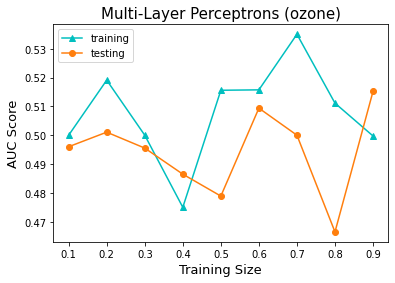

In [150]:
# Get Features & Target variables
features_columns = ozone.columns[:-1] # exclude 'Class'
X = ozone[features_columns] # Features
y = ozone['Class'] # Target

training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
MLP_AUC_train = []
MLP_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit Multi-Layer Perceptrons 
  clf = MLPClassifier(activation = 'logistic', 
                    solver = 'adam',
                    alpha = 1e-5,
                    max_iter = 1000,  
                    hidden_layer_sizes = (15, 10),
                    random_state = 1,
                    learning_rate_init = 0.5)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'roc_auc').mean()
  MLP_AUC_train.append(train_scores)
  MLP_AUC_test.append(test_scores)

# plotting
plt.plot(training_sizes, MLP_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, MLP_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom left')
plt.title('Multi-Layer Perceptrons (ozone)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

### 1-2 steel plates data 

#### 1-2.1 Decision Tree (binary)

Text(0, 0.5, 'AUC Score')

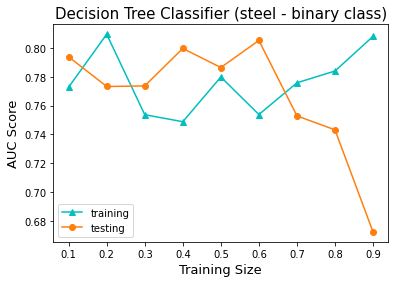

In [8]:
# Get Features & Target variables
features_columns = steel_bin.columns[:-1] # exclude 'Class'
X = steel_bin[features_columns] # Features
y = steel_bin['Class'] # Target

training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
DT_AUC_train = []
DT_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit DecisionTree 
  clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 50)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, scoring = 'roc_auc').mean()
  DT_AUC_train.append(train_scores)
  DT_AUC_test.append(test_scores)

# plotting
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Decision Tree Classifier (steel - binary class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

#### 1-2.2 Decision Tree (multi-class)

Text(0, 0.5, 'Accuracy')

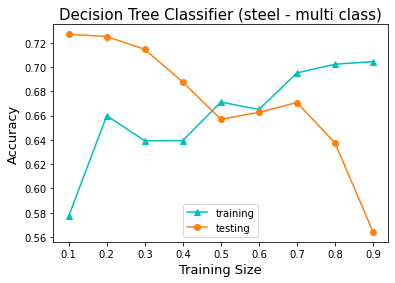

In [9]:
# Get Features & Target variables
features_columns = steel_mul.columns[:-1] # exclude 'Class'
X = steel_mul[features_columns] # Features
y = steel_mul['multi_class'] # Target

training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
DT_AUC_train = []
DT_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit DecisionTree 
  clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 50)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, scoring = 'accuracy').mean()
  DT_AUC_train.append(train_scores)
  DT_AUC_test.append(test_scores)

# plotting
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Decision Tree Classifier (steel - multi class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('Accuracy', size = 13)

#### 1-2.3 Multi-Layer Perceptrons (binary)     

Text(0, 0.5, 'AUC Score')

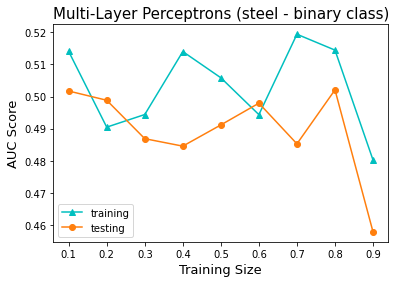

In [38]:
# Get Features & Target variables
features_columns = steel_bin.columns[:-1] # exclude 'Class'
X = steel_bin[features_columns] # Features
y = steel_bin['Class'] # Target

training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
MLP_AUC_train = []
MLP_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit Multi-Layer Perceptrons 
  clf = MLPClassifier(activation = 'logistic', 
                    solver = 'adam',
                    alpha = 1e-5,
                    max_iter = 1000,  
                    hidden_layer_sizes = (15, 10),
                    random_state = 1,
                    learning_rate_init = 0.5)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'roc_auc').mean()
  MLP_AUC_train.append(train_scores)
  MLP_AUC_test.append(test_scores)

# plotting
plt.plot(training_sizes, MLP_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, MLP_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom left')
plt.title('Multi-Layer Perceptrons (steel - binary class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

#### 1-2.4 Multi-Layer Perceptrons (multi-class)     




Text(0, 0.5, 'Accuracy')

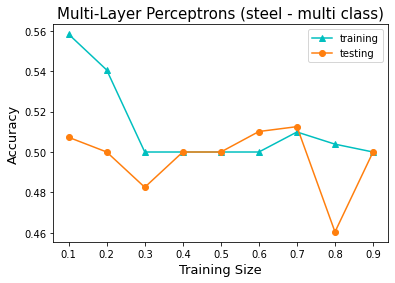

In [39]:
# Get Features & Target variables
features_columns = steel_mul.columns[:-1] # exclude 'Class'
X = steel_mul[features_columns] # Features
y = steel_mul['multi_class'] # Target

training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
MLP_AUC_train = []
MLP_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit Multi-Layer Perceptrons 
  clf = MLPClassifier(activation = 'logistic', 
                    solver = 'adam',
                    alpha = 1e-5,
                    max_iter = 1000,  
                    hidden_layer_sizes = (15, 10),
                    random_state = 1,
                    learning_rate_init = 0.5)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'accuracy').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'accuracy').mean()
  MLP_AUC_train.append(train_scores)
  MLP_AUC_test.append(test_scores)

# plotting
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Multi-Layer Perceptrons (steel - multi class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('Accuracy', size = 13)

## 2) Can overfitting be overcome by feature selection?

### 2-1 ozone data (Feature Selection)

#### 2-1.1 Decision Tree

In [ ]:
features_columns = ozone.columns[:-1] # exclude 'Class'
X = ozone[features_columns] # Features
y = ozone['Class'] # Target

# feature selection - Univariate F-test Feature selection
X_new = SelectKBest(f_classif, k = 24).fit_transform(X, y)
print(X_new.shape)

Text(0, 0.5, 'AUC Score')

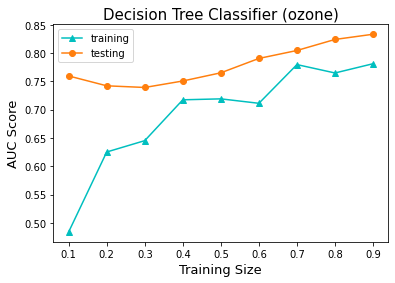

In [89]:
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
DT_AUC_train = []
DT_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit DecisionTree 
  clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 50)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'roc_auc').mean()
  DT_AUC_train.append(train_scores)
  DT_AUC_test.append(test_scores)

# plotting
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Decision Tree Classifier (ozone)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

#### 2-1.2 Multi-Layer Perceptrons

In [ ]:
features_columns = ozone.columns[:-1] # exclude 'Class'
X = ozone[features_columns] # Features
y = ozone['Class'] # Target

# feature selection - Tree-based Feature Selection
clf = ExtraTreesClassifier(n_estimators = 2)
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

Text(0, 0.5, 'AUC Score')

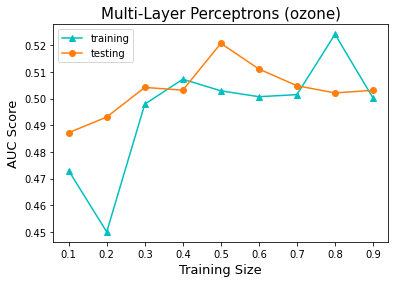

In [97]:
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
MLP_AUC_train = []
MLP_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit Multi-Layer Perceptrons 
  clf = MLPClassifier(activation = 'logistic', 
                    solver = 'adam',
                    alpha = 1e-5,
                    max_iter = 700,  
                    hidden_layer_sizes = (15, 10),
                    random_state = 1,
                    learning_rate_init = 0.5)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'roc_auc').mean()
  MLP_AUC_train.append(train_scores)
  MLP_AUC_test.append(test_scores)

# plotting
plt.plot(training_sizes, MLP_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, MLP_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom left')
plt.title('Multi-Layer Perceptrons (ozone)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

### 2-2 steel plates data (Feature Selection)

#### 2-2.1 Decision Tree (binary)

In [148]:
features_columns = steel_bin.columns[:-1] # exclude 'Class'
X = steel_bin[features_columns] # Features
y = steel_bin['Class'] # Target

# feature selection - Univariate F-test Feature selection
X_new = SelectKBest(f_classif, k = 13).fit_transform(X, y)
print(X_new.shape)

(1941, 13)


Text(0, 0.5, 'AUC Score')

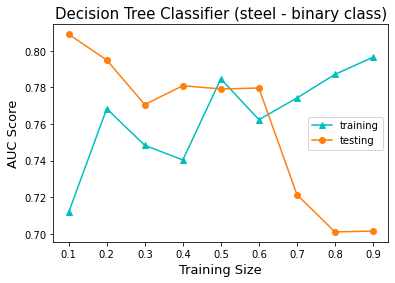

In [149]:
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
DT_AUC_train = []
DT_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit DecisionTree 
  clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 50)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'roc_auc').mean()
  DT_AUC_train.append(train_scores)
  DT_AUC_test.append(test_scores)

# plotting
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Decision Tree Classifier (steel - binary class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

#### 2-2.2 Decision Tree (multi-class)

In [135]:
# Get Features & Target variables
features_columns = steel_mul.columns[:-1] # exclude 'Class'
X = steel_mul[features_columns] # Features
y = steel_mul['multi_class'] # Target

# feature selection - Tree-based Feature Selection
clf = ExtraTreesClassifier(n_estimators = 3)
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

(1941, 9)


Text(0, 0.5, 'Accuracy')

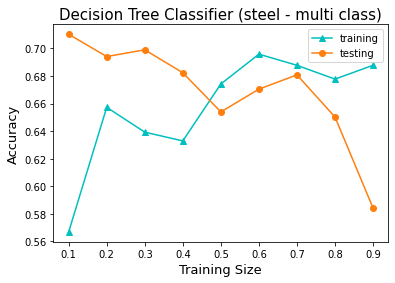

In [136]:
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
DT_AUC_train = []
DT_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit DecisionTree 
  clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 50)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'accuracy').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'accuracy').mean()
  DT_AUC_train.append(train_scores)
  DT_AUC_test.append(test_scores)

# plotting
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Decision Tree Classifier (steel - multi class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('Accuracy', size = 13)

#### 2-2.3 Multi-Layer Perceptrons (binary)

In [142]:
# Get Features & Target variables
features_columns = steel_bin.columns[:-1] # exclude 'Class'
X = steel_bin[features_columns] # Features
y = steel_bin['Class'] # Target

# feature selection - Univariate F-test Feature selection
X_new = SelectKBest(f_classif, k = 12).fit_transform(X, y)
print(X_new.shape)

(1941, 12)


Text(0, 0.5, 'AUC Score')

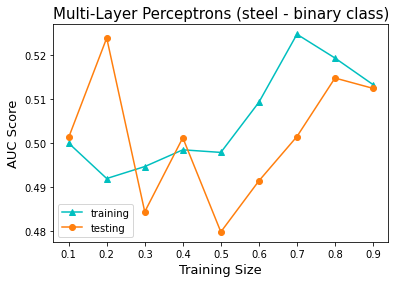

In [143]:
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
MLP_AUC_train = []
MLP_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit Multi-Layer Perceptrons 
  clf = MLPClassifier(activation = 'logistic', 
                    solver = 'adam',
                    alpha = 1e-5,
                    max_iter = 1000,  
                    hidden_layer_sizes = (15, 10),
                    random_state = 1,
                    learning_rate_init = 0.5)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'roc_auc').mean()
  MLP_AUC_train.append(train_scores)
  MLP_AUC_test.append(test_scores)

# plotting
plt.plot(training_sizes, MLP_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, MLP_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom left')
plt.title('Multi-Layer Perceptrons (steel - binary class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

#### 2-2.4 Multi-Layer Perceptrons (multi-class)    

In [140]:
# Get Features & Target variables
features_columns = steel_mul.columns[:-1] # exclude 'Class'
X = steel_mul[features_columns] # Features
y = steel_mul['multi_class'] # Target

# feature selection - Univariate F-test Feature selection
X_new = SelectKBest(f_classif, k = 10).fit_transform(X, y)
print(X_new.shape)

(1941, 10)


Text(0, 0.5, 'Accuracy')

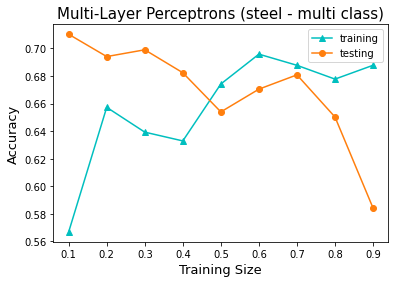

In [141]:
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
MLP_AUC_train = []
MLP_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit Multi-Layer Perceptrons 
  clf = MLPClassifier(activation = 'logistic', 
                    solver = 'adam',
                    alpha = 1e-5,
                    max_iter = 1000,  
                    hidden_layer_sizes = (15, 10),
                    random_state = 1,
                    learning_rate_init = 0.5)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'accuracy').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'accuracy').mean()
  MLP_AUC_train.append(train_scores)
  MLP_AUC_test.append(test_scores)

# plotting
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Multi-Layer Perceptrons (steel - multi class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('Accuracy', size = 13)

## 3) Are either of your datasets imbalanced?

In [158]:
# view the frequency between binary classes steel plates data
print('binary steel: ')
print(steel_bin.Class.value_counts())
print(' - - - - - - - ')
# view the frequency between multiple classes steel plates data
print('multi-class steel: ')
print(steel_mul.multi_class.value_counts())
print(' - - - - - - - ')
# view the frequency between ozone data
print('ozone: ')
print(ozone.Class.value_counts())

binary steel: 
1    1268
2     673
Name: Class, dtype: int64
 - - - - - - - 
multi-class steel: 
7    673
6    402
3    391
2    190
1    158
4     72
5     55
Name: multi_class, dtype: int64
 - - - - - - - 
ozone: 
1    2374
2     160
Name: Class, dtype: int64
